# ¡Hola, Juan David!  

Mi nombre es Francisco Benavides, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

<div class="alert alert-block alert-danger">
<b>Comentarios Generales</b> <a class="tocSkip"></a>
    
Hola Juan, gracias por enviar tu proyecto, esta muy bien realizado! te felicito.

Hay dos puntos menores a corregir, en la revisión de NaNs y en la parte B, espero que mis comentarios te ayuden a resolverlo rapidamente.

Animo!

</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Mediante pandas leeremos los archivos dados con la función .read_csv luego visualizaremos las bases de datos y su info para empezar con su procesamiento y posterior análisis.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# leer conjuntos de datos en los DataFrames
orders= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/instacart_orders.csv', sep = ";")
products= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/products.csv', sep = ";")
aisles= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/aisles.csv', sep = ";")
departments= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/departments.csv', sep = ";")
order_products= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/order_products.csv', sep = ";")


In [3]:
# mostrar información del DataFrame
display(orders.head())

orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
display(products.head())

products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
display(aisles.head())

aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
display(departments.head())

departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
display(order_products.head())

order_products.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Se reciben 5 bases de datos que se pueden relacionar entre sí. 
Presentamos algunos datos ausentes en algunas bases:
-	orders tiene algunos datos ausentes o nulos en su columna days_since_prior_order, los cual puede ser a que el cliente no realizo pedidos anteriormente.
-	products presenta datos ausentes o nulos en product_name
-	aisles tiene todos sus datos completos al igual que departments
-	order_products presenta datos ausentes o nulos en add_to_cart_order adicionalmente el tipo de datos de esta columna debe ser corregido mas adelante.




<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de mostrar la información! además el analisis del estado de los datos es correcto
</div>


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Partiendo de la descripción de las columnas dadas al inicio verificaremos que el tipo de datos correspondan con lo esperado, de no ser así se cambiara el tipo de datos, ejemplo order_products es orden en que se añadió al carrito, lo cual es un entero, no un flotante.

Luego de tener el tipo de datos correcto se identificará que columnas tienen datos ausentes, la cantidad de ellos y relevancia. De no afectar el análisis de los datos estos pueden ser reemplazados por 'unknown'. Luego de esto revisaremos de nuevo que no haya datos ausentes.

Por ultimo verificaremos que no tengamos datos duplicados explícitos o implícitos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen plan de trabajo, lo importante es que esta en linea con los problemas identificados, muy bien!
</div>


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(f'Cantidad de duplicados:{orders.duplicated().sum()}')

orders[orders.duplicated()]

Cantidad de duplicados:15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Con el metodo .duplicated() se identifican 15 valores duplicados que se dan a las 2 de la mañana los miércoles.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders[(orders.order_dow == 3) & (orders.order_hour_of_day == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Se encuentra una mayor cantidad de pedidos realizados a las dos de la mañana el miércoles, superando en gran cantidad a los duplicados encontrados en ese periodo, por lo cual podemos eliminar dichos duplicados sin afectar el análisis. Es posible que los duplicados se deban a un error externo.

In [10]:
# Elimina los pedidos duplicados
orders= orders.drop_duplicates().reset_index(drop = True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(f'Cantidad de duplicados:{orders.duplicated().sum()}')


Cantidad de duplicados:0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders.duplicated(subset= 'order_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos:

Se logra ver que luego de eliminar los duplicados no hay ordenes repetidas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis respecto a los duplicados y acertada decisión para solucionarlos
</div>


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(f'Cantidad de duplicados:{products.duplicated().sum()}')

products[products.duplicated()]

Cantidad de duplicados:0


,product_id,product_name,aisle_id,department_id


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
products.duplicated(subset= 'product_id').sum()

0

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name']= products['product_name'].str.upper()
print(f'Cantidad de nombres de productos repetidos: {products.duplicated(subset= "product_name").sum()}')
products[products.duplicated(subset= "product_name")]

Cantidad de nombres de productos repetidos: 1361


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products[~(products['product_name'].isna()) & (products['product_name'].duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Encontramos que todos los valores de la tabla son únicos, pero que si hay productos que se repiten, dentro de los productos repetidos encontramos que algunos de ellos son nombres ausentes o faltantes, La gran mayoría en el departamento 21. Queda por verificar si todos los productos con nombre faltante están ubicados en el departamento 21 o existen también en otros departamentos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente observación respecto a los duplicados en los productos!
</div>


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(f'Cantidad de duplicados:{departments.duplicated().sum()}')

departments[departments.duplicated()]

Cantidad de duplicados:0


,department_id,department


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
departments.duplicated(subset= 'department_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encuentra que toda la lista de departamentos tiene valores únicos.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(f'Cantidad de duplicados:{aisles.duplicated().sum()}')

aisles[aisles.duplicated()]

Cantidad de duplicados:0


,aisle_id,aisle


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles.duplicated(subset= 'aisle_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encuentra que toda la lista de departamentos tiene valores únicos.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(f'Cantidad de duplicados:{order_products.duplicated().sum()}')

order_products[order_products.duplicated()]

Cantidad de duplicados:0


,order_id,product_id,add_to_cart_order,reordered


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[order_products.duplicated(subset= ['order_id', 'product_id'])]

,order_id,product_id,add_to_cart_order,reordered


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encuentra que toda la lista de departamentos tiene valores únicos, no hay ningún duplicado implícito o explicito

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(f'Numero de los valores ausentes en la columna product_name: {products["product_name"].isna().sum()}')
products[products['product_name'].isna()]

Numero de los valores ausentes en la columna product_name: 1258


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Se encuentran un total de 1258 valores ausentes en la columna product_name, al parecer todos con aisle_id igual a 100 y department_id igual a 21

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

se corrobora que no hay ningún producto con nombre ausente fuera del pasillo con ID 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

No existen productos con nombre ausente fuera del departamento 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(departments[departments['department_id']== 21])
print()
display(aisles[aisles['aisle_id']== 100])


,department_id,department
20,21,missing


,aisle_id,aisle
99,100,missing


Describe brevemente cuáles son tus hallazgos.

Tanto el departamento 21 como el pasillo 100 estaban catalogados llevan el nombre de ausentes, por lo cual podemos reemplazar los nombres ausentes por Unknown sin que esto afecte el análisis de los datos. 

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name']= products['product_name'].fillna('Unknown')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Todos los productos con nombres ausentes pertenecían a al departamento 21 y pasillo 100, los cuales están catalogados como ausentes, esto nos permite remplazar los nombres de los productos por Unknown debido a que no podemos determinar cual es su nombre preciso.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente desarrollo para investifar los ausentes en este dataframe, se entiende perfecto el analisis realizado
</div>


### `orders` data frame

In [28]:
# Encuentra los valores ausentes
orders.isna().sum()


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encuentran valores ausente que no sea el primer pedido del cliente. los valores ausentes se deben a que no se puede registrar ningún número de días transcurridos desde que este cliente hizo su pedido anterior, ya que es el primer pedido realizado. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Puedes profundizar de por que esta columna tienen NaNs cuando es el primer pedido?
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>    
    
Muchas gracias por la observación, es más claro el análisis y la explicación de conclusión teniendo en cuenta  tu observación    
</div>



### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

se añadió un máximo de 64 artículo al carrito y un minimo de un producto.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
#Este es el codigo que inicialmente tenia:
#add_to_cart_order= order_products['order_id'][order_products['add_to_cart_order'].isna()]

lista_ausentes = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].tolist()


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
#Este es el codigo que inicialmente tenia:
#datos_ausentes= add_to_cart_order.groupby(order_products['product_id']).count().min()

order_products_filtrado = order_products[order_products['order_id'].isin(lista_ausentes)]

conteo = order_products_filtrado.groupby('order_id')['product_id'].count().min()

print(conteo)

65


Describe brevemente cuáles son tus hallazgos.

Todos los pedidos con valores ausentes tienen mas de de 64 productos, he hecho la cantidad minima es de 65.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')
order_products.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Debido a que  los pedidos con valores ausentes tienen diferentes numero de productos, se toma la decisión de cambiar el valor ausente por el numero 999.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Este analisis no esta bien realizado, los pasos son los siguientes:
    
    - Generar una lista de los order_id en los que tienes NaN.
    - Filtrar el dataframe usando la lista anterior.
    - Agrupar por order_id y hacer un conteo sobre el product_id.
    - Revisar el minimo de este conteo.

Alli notaras que tus conclusiones son otras
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>    
    
Muchas gracias por la observación, es el código estaba totalmente malo, ya lo corregí, igual deje el Código anterior para que veas el cambio hecho.   
</div>

## Conclusiones


Luego del procesamiento de datos tenemos que:

-	Para orders en primer lugar identificamos valores duplicados que se dan a las 2 de la mañana los miércoles, como estos valores parecen ser un error y no son una cantidad significativa, se decide eliminarlos.  
-	En products encontramos que todos los valores de la tabla son únicos, pero hay productos que se repiten, dentro de los productos repetidos encontramos que algunos de ellos son nombres ausentes o faltantes, todos ellos en el departamento 21 y pasillo 100, al revisar el nombre de ese departamento y pasillo nos damos cuenta de que es: missing, por lo cual se cambian los nombres de los productos ausentes por: Unknown
-	aisles tiene todos sus datos completos al igual que departments.
-	order_products presentaba datos ausentes o nulos en add_to_cart_order, se procede a verificar si los datos ausentes tienen un patrón para poder ser reemplazados por algún dato en específico y debido a que los pedidos con valores ausentes tienen diferentes números de productos, se toma la decisión de cambiar el valor ausente por el número 999.  Adicionalmente se cambia el tipo de datos de esta columna.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(f'valor minimo: {orders["order_hour_of_day"].min()}, Valor maximo {orders["order_hour_of_day"].max()}')

sorted(orders['order_hour_of_day'].unique())

valor minimo: 0, Valor maximo 23


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [36]:
print(f'valor minimo: {orders["order_dow"].min()}, Valor maximo {orders["order_dow"].max()}')

sorted(orders['order_dow'].unique())

valor minimo: 0, Valor maximo 6


[0, 1, 2, 3, 4, 5, 6]

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Intenta mostrar todos los valores para asegurarnos de que estan todos presentes.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Muchas gracias por el comentario, se entiende mejor los valores al mostrar todos y no solo los mínimos y máximos.

Escribe aquí tus conclusiones

Los valores para hora y día están dentro del rango esperado.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Numero de pedidos por horas'}, xlabel='Horas del dia', ylabel='Cantidad de ordenes'>

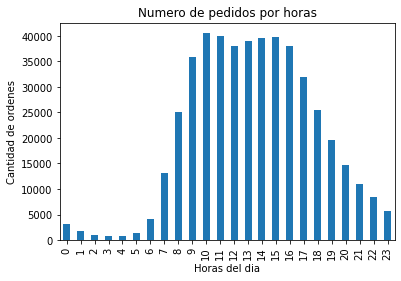

In [37]:
ordens_for_hour= orders.groupby('order_hour_of_day').size()

ordens_for_hour.plot(title= 'Numero de pedidos por horas',
                    kind= 'bar',            
                    xlabel= 'Horas del dia',
                    ylabel= 'Cantidad de ordenes')

Escribe aquí tus conclusiones

Los clientes tienden a hacer sus pedidos mayormente entre las 10 de la mañana y las 3 de la tarde y las horas con menor actividad de compras son de las 2 a 5 de la mañana.

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:title={'center':'Compra de productos por dias'}, xlabel='Dias de la semana', ylabel='Cantidad de ventas'>

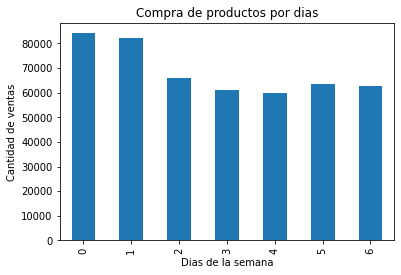

In [38]:
ordens_for_day= orders.groupby('order_dow').size()

ordens_for_day.plot(title= 'Compra de productos por dias',
                    kind= 'bar',            
                    xlabel= 'Dias de la semana',
                    ylabel= 'Cantidad de ventas')

Escribe aquí tus conclusiones

los días con mayores ventas son el domingo y lunes, los demás días hay un flujo muy parecido de compras, aunque es el jueves el día más bajo en compras.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:title={'center':'Dias esperados para hacer una nueva compra'}, xlabel='Dias despues de la compra anterior', ylabel='Cantidad de ventas'>

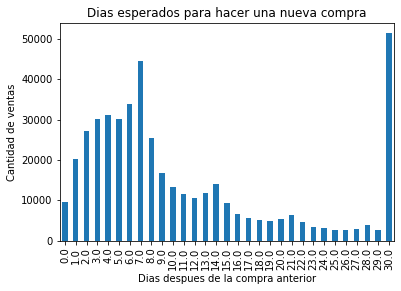

In [39]:
tiempo_de_espera = orders.groupby("days_since_prior_order").size()

tiempo_de_espera.plot(title= 'Dias esperados para hacer una nueva compra',
                    kind= 'bar',            
                    xlabel= 'Dias despues de la compra anterior',
                    ylabel= 'Cantidad de ventas')

Escribe aquí tus conclusiones

La gran mayoría de personas tienden a esperar 30 días para volver a ser sus compras, aunque también hay un buen grupo de clientes que realizan sus compras cada 7 días. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo en la Parte A, felicidades!
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
ventas_miercoles = orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
ventas_sabado = orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

In [41]:
miercoles_y_sabado = pd.concat([ventas_miercoles, ventas_sabado], axis= 1)

miercoles_y_sabado.columns= ['Miercoles', 'Sabado']



<AxesSubplot:title={'center':'Comparativo de compras Miercoles y Sabado'}, xlabel='Horas del dia', ylabel='Cantidad de ventas'>

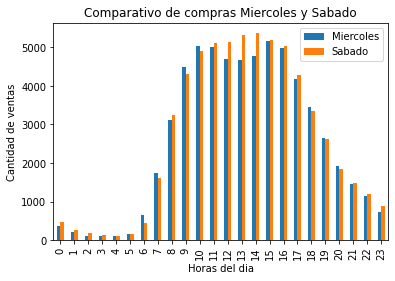

In [42]:
miercoles_y_sabado.plot(title= 'Comparativo de compras Miercoles y Sabado',
                    kind= 'bar',            
                    xlabel= 'Horas del dia',
                    ylabel= 'Cantidad de ventas')

Escribe aquí tus conclusiones

La actividad de los clientes es muy similar los días miércoles y sábados, con la diferencia que los días sábados hay un mayor flujo de ventas entre las 12 y 2 de la tarde comparado a estas mismas horas del miércoles.

 <div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buena gráfica y comparativa!
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
#order_counts = orders['order_number'].value_counts().sort_index() -- este es el codigo que tenia inicialmente, 
#lo cambio por el siguiente:

order_counts = orders.groupby(['user_id'])['order_number'].count().value_counts()
display(order_counts)

1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
22       23
21       22
23       19
24        3
25        1
26        1
28        1
Name: order_number, dtype: int64

<AxesSubplot:title={'center':'Distribución del Número de Órdenes por Cliente'}, xlabel='Número de Órdenes', ylabel='Número de Clientes'>

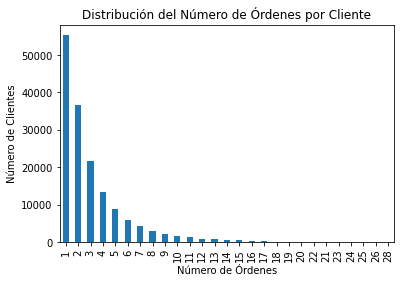

In [44]:
order_counts.plot(title= 'Distribución del Número de Órdenes por Cliente',
                    kind= 'bar',            
                    xlabel= 'Número de Órdenes',
                    ylabel= 'Número de Clientes',
                    legend=False,)
                  

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Como te piden ver el número de pedidos por cliente, lo que debes hacer es una agrupación a nivel de cliente y contar los pedidos que han realizado.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Estaba contando solo las ordenes como tal, no los pedidos por cada cliente, error corregido

Escribe aquí tus conclusiones

lo más común es que los clientes realicen tres 1 a 4 órdenes, luego el número de ordenes ya cayendo dramaticamente.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
productos_id= (order_products.merge(products, on = 'product_id'))

In [46]:
top= productos_id.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending = False)

In [47]:
top_20= top.head(20)

display(top_20)

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,66050,66050,66050,66050,66050
13176,BAG OF ORGANIC BANANAS,53297,53297,53297,53297,53297
21137,ORGANIC STRAWBERRIES,37039,37039,37039,37039,37039
21903,ORGANIC BABY SPINACH,33971,33971,33971,33971,33971
47209,ORGANIC HASS AVOCADO,29773,29773,29773,29773,29773
47766,ORGANIC AVOCADO,24689,24689,24689,24689,24689
47626,LARGE LEMON,21495,21495,21495,21495,21495
16797,STRAWBERRIES,20018,20018,20018,20018,20018
26209,LIMES,19690,19690,19690,19690,19690


<AxesSubplot:title={'center':'Top 20 de los productos mas populares'}, xlabel='Producto', ylabel='cantidad de pedidos'>

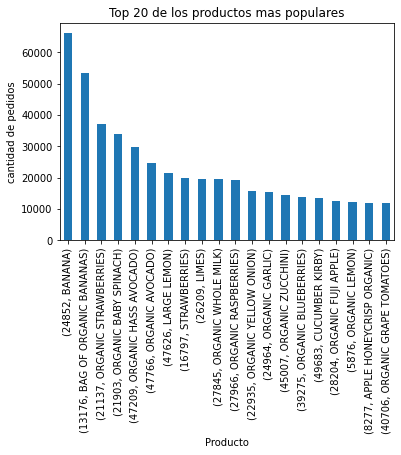

In [48]:
top_20.plot(title= 'Top 20 de los productos mas populares',
                    kind= 'bar',
                    y= 'order_id',
                    xlabel= 'Producto',
                    ylabel= 'cantidad de pedidos',
                    legend=False,
                               )

Escribe aquí tus conclusiones

Los 20 productos más populares son frutas y verduras principalmente.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien calculado los top 20 productos, puedes añadir una gráfica que te permita comparar rapidamente la cantidad de pedidos realizados entre ellos
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    Muchas gracias por el comentario, la informacion es mas clara adicionando una grafiaca.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
num_items= order_products.groupby('order_id')['product_id'].count()

In [50]:
productos_por_pedido= num_items.value_counts().sort_index()

<AxesSubplot:title={'center':'Articulos comprados por pedido'}, xlabel='Numero articulos', ylabel='Numero de pedidos'>

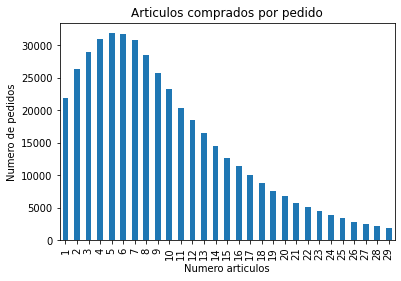

In [51]:
productos_por_pedido[productos_por_pedido.index < 30].plot(kind= 'bar',
                          title= 'Articulos comprados por pedido',
                          xlabel= 'Numero articulos',
                          ylabel= 'Numero de pedidos'
                         )

Escribe aquí tus conclusiones

Lo más común es que los clientes realicen compras con una cantidad de productos entre 4 y 8, siendo las compras con 5 productos las más comunes.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
productos_reordered= order_products[order_products['reordered'] == 1]

In [53]:
productos_id= (productos_reordered.merge(products, on = 'product_id'))

In [54]:
top_reordered= productos_id.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending = False)

In [55]:
top_20_reordered= top_reordered.head(20)

display(top_20_reordered)

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,BANANA,55763,55763,55763,55763,55763
13176,BAG OF ORGANIC BANANAS,44450,44450,44450,44450,44450
21137,ORGANIC STRAWBERRIES,28639,28639,28639,28639,28639
21903,ORGANIC BABY SPINACH,26233,26233,26233,26233,26233
47209,ORGANIC HASS AVOCADO,23629,23629,23629,23629,23629
47766,ORGANIC AVOCADO,18743,18743,18743,18743,18743
27845,ORGANIC WHOLE MILK,16251,16251,16251,16251,16251
47626,LARGE LEMON,15044,15044,15044,15044,15044
27966,ORGANIC RASPBERRIES,14748,14748,14748,14748,14748


Escribe aquí tus conclusiones

Los 20 productos que se tienden a pedir con más frecuencias son las frutas y las verduras.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
producto_pedido= order_products.merge(orders, on = 'order_id')
producto_reordered= producto_pedido.groupby('product_id')['reordered'].mean()

In [57]:
producto_reordered= producto_reordered.sort_values(ascending = False).reset_index()


In [58]:
nombre_producto= products[['product_id', 'product_name']]
item_reordered = producto_reordered.merge(nombre_producto, on = 'product_id')
item_reordered.head(20)

,product_id,reordered,product_name
0,14721,1.0,BONE STRENGTH TAKE CARE
1,20949,1.0,VANILLA SANDWICH COOKIES
2,6723,1.0,PALMIERS- PETITE
3,6732,1.0,NATURALLY SPARKLING MINERAL WATER
4,45088,1.0,CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & ...
5,45078,1.0,POMEGRANATEA
6,21016,1.0,PARCHMENT LINED 8 IN X 3.75 IN X 2.5 IN PANS
7,21005,1.0,PEANUT BUTTER PIE ICE CREAM
8,35192,1.0,CHOCOLATE SOY MILK SINGLES
9,35197,1.0,MOCHA CHOCOLATE CHIP ORGANIC NON-DAIRY FROZEN...


Escribe aquí tus conclusiones.

Hay una gran proporción de productos que se vuelven a pedir.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
cliente_pedido= order_products.merge(orders, on = 'order_id')
pedido_reordered= cliente_pedido.groupby('user_id')['reordered'].mean()


In [60]:
pedido_reordered.sort_values(ascending = False).reset_index()

,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


Escribe aquí tus conclusiones

La mayoría de clientes vuelve a pedir los mismos productos que sus compras anteriores.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
pedidos= order_products.merge(products)
articulo_uno= pedidos[pedidos['add_to_cart_order'] == 1]

In [62]:
producto_uno= articulo_uno.groupby('product_name').count().sort_values(['order_id'], ascending = False)
producto_uno.head(20)

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id
product_name,,,,,,
BANANA,15562,15562,15562,15562,15562,15562
BAG OF ORGANIC BANANAS,11026,11026,11026,11026,11026,11026
ORGANIC WHOLE MILK,4363,4363,4363,4363,4363,4363
ORGANIC STRAWBERRIES,3946,3946,3946,3946,3946,3946
ORGANIC HASS AVOCADO,3390,3390,3390,3390,3390,3390
ORGANIC BABY SPINACH,3336,3336,3336,3336,3336,3336
ORGANIC AVOCADO,3044,3044,3044,3044,3044,3044
SPRING WATER,2336,2336,2336,2336,2336,2336
STRAWBERRIES,2308,2308,2308,2308,2308,2308


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en la parte C!
</div>

Escribe aquí tus conclusiones.

Los clientes tienden a poner de primero en sus carritos frutas y verduras.

### Conclusion general del proyecto:

Luego del procesamiento de los datos y posterior análisis de los mismos podemos concluir de manera general lo siguiente:

1.	Horario y días de compras: Los clientes tienden a hacer la mayoría de sus pedidos entre las 10 de la mañana y las 3 de la tarde. Durante estas horas, hay una mayor actividad de compras. Por otro lado, las horas con menor actividad de compras son de las 2 a 5 de la mañana. En cuanto a los días encontramos que las mayores ventas son el domingo y el lunes. En estos días, se registra un mayor flujo de compras. En los demás días de la semana, el flujo de compras es bastante similar, aunque el jueves es el día con menor cantidad de compras. Al comparar los miércoles y sábados nos damos cuenta de que presentan una actividad de clientes muy similar. No obstante, los sábados hay un mayor flujo de ventas entre las 12 y las 2 de la tarde en comparación con estas mismas horas del miércoles. 
La gran mayoría de clientes tiende a esperar 30 días para volver a realizar sus compras. Sin embargo, también hay un grupo significativo de clientes que realizan sus compras cada 7 días.


2.	Órdenes y productos: Lo más común es que los clientes realicen entre 1 y 4 órdenes, realizando compras con una cantidad de productos entre 4 y 8, siendo las compras con 5 productos las más comunes. Las frutas y verduras, se encuentran entre los productos mas populares, que se piden con mas frecuencia y que primero colocan en sus carritos.


3.	Repetición de productos: Existe una gran proporción de productos que los clientes vuelven a pedir. La mayoría de los clientes repite los mismos productos de sus compras anteriores.
